### DEMSLV09

# Hard nonlinear complementarity problem with Billup's function

Solve hard nonlinear complementarity problem on R using semismooth and minmax methods.  Problem involves Billup's function.  Minmax formulation fails semismooth formulation suceeds.

The function to be solved is $$f(x) = 1.01 - (1- x)^2$$
where $x \geq 0$. Notice that $f(x)$ has roots $1\pm\sqrt{1.01}$

### Preliminary tasks

In [1]:
from numpy.linalg import norm
from compecon import MCP, tic, toc, nodeunif
from demos.setup import demo, np, plt
%matplotlib inline

### Billup's function roots are

In [2]:
roots = 1 + np.sqrt(1.01), 1 - np.sqrt(1.01)
print(roots)

(2.0049875621120892, -0.0049875621120889502)


### Set up the problem
The class **MCP** is used to represent mixed-complementarity problems. To create one instance, we define the objective function and the boundaries $a$ and $b$ such that for $a \leq x \leq b$

In [3]:
def billups(x):
    fval = 1.01 - (1 - x) ** 2
    return fval, 2*(1 - x )

a = 0
b = np.inf

Billups = MCP(billups, a, b)

### Solve by applying Newton method
* Using minmax formulation
Initial guess is $x=0$

In [4]:
t1 = tic()
x1 = Billups.zero(0.0, transform='minmax')
t1 = 100*toc(t1)

* Using semismooth formulation

In [5]:
t2 = tic()
x2 = Billups.zero(0.0, transform='ssmooth')
t2 = 100*toc(t2)

### Print results
Hundreds of seconds required to solve hard nonlinear complementarity problem using Newton minmax and semismooth formulations

In [6]:
frm = '{:17} {:6.3f} {:8.1e} {:>10.6f}'
prt = lambda d, t,x: print(frm.format(d, t,norm(Billups.minmax(x)), *x))

print('{:17} {:^6} {:^8} {:^10}'.format('Algorithm','Time','Norm','x'))
print('-' * 44)
prt('Newton minmax', t1, x1)
prt('Newton semismooth', t2, x2)

Algorithm          Time    Norm       x     
--------------------------------------------
Newton minmax      0.702  5.0e-03  -0.004988
Newton semismooth  0.000  5.0e-03  -0.004988


### Plot results
Here we use the methods *ssmooth* and *minmax* from class **MCP** to compute the semi-smooth and minimax transformations. 

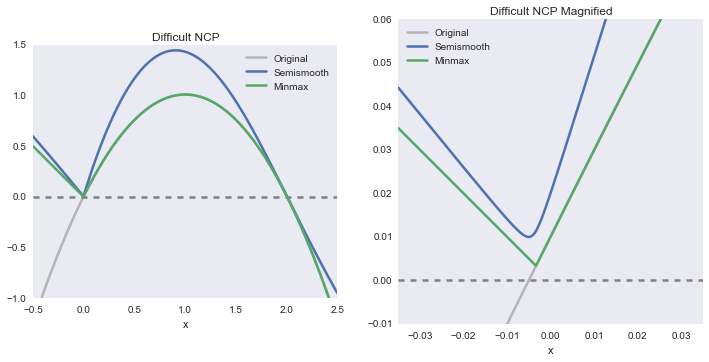

In [7]:
fig = plt.figure(figsize=[12,6])
original = {'label':'Original', 'alpha':0.5, 'color':'gray'}
xl = [[-0.5, 2.5], [-0.035, 0.035]]
yl = [[-1, 1.5], [-0.01, 0.06]]
ttls = 'Difficult NCP', 'Difficult NCP Magnified'

for i in range(2):
    a, b = xl[i]
    x = nodeunif(500, a, b)
    ax = demo.subplot(1,2,i+1,ttls[i] , 'x', '', xl[i], yl[i])
    ax.set(aspect=1)
    plt.hlines(0, a, b, 'gray', '--')
    plt.plot(x, billups(x)[0], **original)
    plt.plot(x, Billups.ssmooth(x), label='Semismooth')
    plt.plot(x, Billups.minmax(x), label='Minmax')
    plt.legend(loc='best')
    
plt.show()